# **Data Visualization Notebook - Benign and Malignant classification of Skin Lesions**

## Objectives

* Answer business requirement 1:  
The client is interested in having a study to visually differentiate a benign skin lesion from a malignant one

## Inputs
* input/Benign_Malignant_Dataset/MainData/  
    * test  
      * benign  
      * malignant  
    * train  
      * benign  
      * malignant   
    * validation  
      * benign  
      * malignant   

## Outputs
* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between healthy brain MRI and the one with a tumor.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

---

## Set Data Directory

---

### Import libraries

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
sns.set_style("white")

### Set working directory

We need to change the working directory from its current folder to its parent folder

We access the current directory with os.getcwd()

In [14]:
current_dir = os.getcwd()
current_dir

'/Users/carolina/Documents/CodeInstitute/benign-malignant-classification/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory  
* os.chir() defines the new current directory

In [15]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [16]:
working_dir = os.getcwd()
working_dir

'/Users/carolina/Documents/CodeInstitute/benign-malignant-classification'

### Set Input Directories

Set train, validation and test paths.

In [17]:
input_dir = 'input/Benign_Malignant_DataSet/MainData/'
train_path = os.path.join(input_dir, 'train')
test_path = os.path.join(input_dir, 'test')
validation_path = os.path.join(input_dir, 'validation')

In [18]:
version = 'v1'
file_path = os.path.join('outputs', version)

if 'outputs' in os.listdir(working_dir) and version in \
        os.listdir(os.path.join(working_dir, 'outputs')):
    print('This version of the output dataset already exists.')
    pass
else:
    os.makedirs(name=file_path)

### Set label names

In [19]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['malignant', 'benign']


### Image Shape

Though the images are of the same shape, we should nevertheless compute the average image size of the train set.

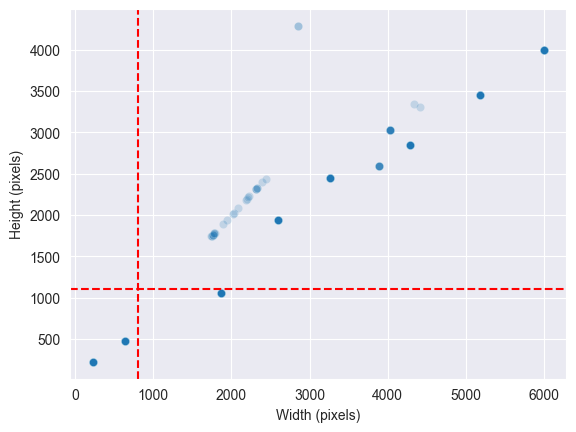

Width average: 1106 
Height average: 800


In [20]:
# analyse image dimensions
image_height, image_width = [], []
for label in labels:
    for image_file in os.listdir(os.path.join(train_path, label)):
        image = imread(os.path.join(train_path, label, image_file))
        image_height.append(image.shape[0])
        image_width.append(image.shape[1])

# plot image dimension graph
sns.set_style('darkgrid')
fig, axes = plt.subplots()
sns.scatterplot(x=image_width, y=image_height, alpha=0.2)
axes.set_xlabel('Width (pixels)')
axes.set_ylabel('Height (pixels)')
image_height_mean = int(np.array(image_height).mean())
image_width_mean = int(np.array(image_width).mean())
axes.axvline(x=image_height_mean, color='r', linestyle='--')
axes.axhline(y=image_width_mean, color='r', linestyle='--')
plt.show()
print(f'Width average: {image_width_mean} \nHeight average: '
      f'{image_height_mean}')

In [21]:
# image_shape = (image_height_mean, image_width_mean, 3)
# instead of taking the identified mean dimensions of the images,
# we will decrease the dimensions in order to increase speed of model training
image_shape = (int(image_height_mean/2.5), int(image_width_mean/2.5), 3)
image_shape

(320, 442, 3)

Save the image shape embeddings (will serve for uploading a photo that is not from the dataset)

In [22]:
joblib.dump(value=image_shape,
            filename=os.path.join(file_path, 'image_shape.pkl'))

['outputs/v1/image_shape.pkl']